We will be using **pandas** and **matplotlib** to manipulate our dataset and to visualize the data. First, we need to import both the libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

After importing them, we need to read our csv file datasets. I have collected two datasets from **[Linear Regression Random Dataset](https://www.kaggle.com/datasets/andonians/random-linear-regression)**. These datasets contain very simple random data for a **linear regression** model traning. The dataset contains a train and a test file. We read from both these files.

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

We can view the top values of these datasets using the **head()** method in pandas. We can also plot these datas using the **matplotlib** library.

   study_time      score
0        24.0  21.549452
1        50.0  47.464463
2        15.0  17.218656
3        38.0  36.586398
4        87.0  87.288984


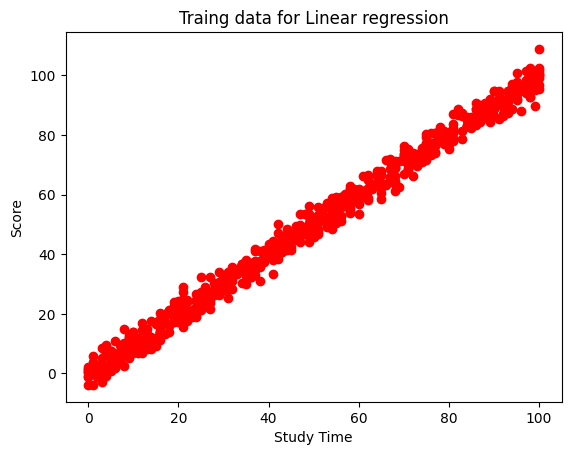

In [14]:
print(train.head())

plt.scatter(train['study_time'], train['score'], color="red")

plt.xlabel('Study Time')
plt.ylabel('Score')
plt.title('Traing data for Linear regression')
plt.show()

   study_time      score
0          77  79.775152
1          21  23.177279
2          22  25.609262
3          20  17.857388
4          36  41.849864


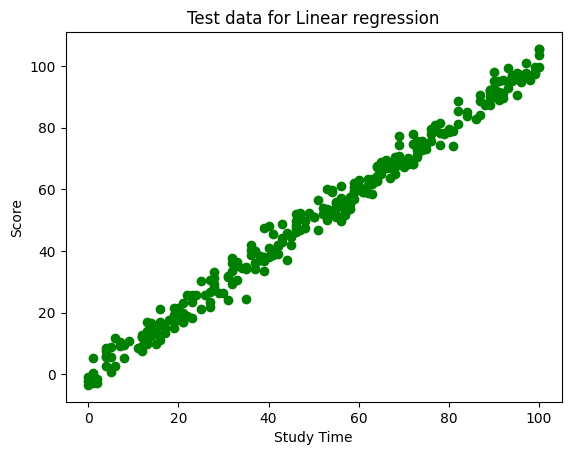

In [15]:
print(test.head())

plt.scatter(test['study_time'], test['score'], color="green")

plt.xlabel('Study Time')
plt.ylabel('Score')
plt.title('Test data for Linear regression')
plt.show()

# **TASK 01**

For this particular **Lab 02**, we are given a **`house_price_data.txt`** file to plot and to use linear regression on that dataset. So first, we will be plotting the given dataset. But first, we need to convert the file into a csv file and then we need to add some headers for the columns. Here, I have added **x**, **y** and **z** headers to the file.

In [18]:
house_price_data = pd.read_csv("house_price_data.csv")
print(house_price_data.head())

      x  y       z
0  2104  3  399900
1  1600  3  329900
2  2400  3  369000
3  1416  2  232000
4  3000  4  539900


# **TASK 02**

Now I will be plotting the dataset.

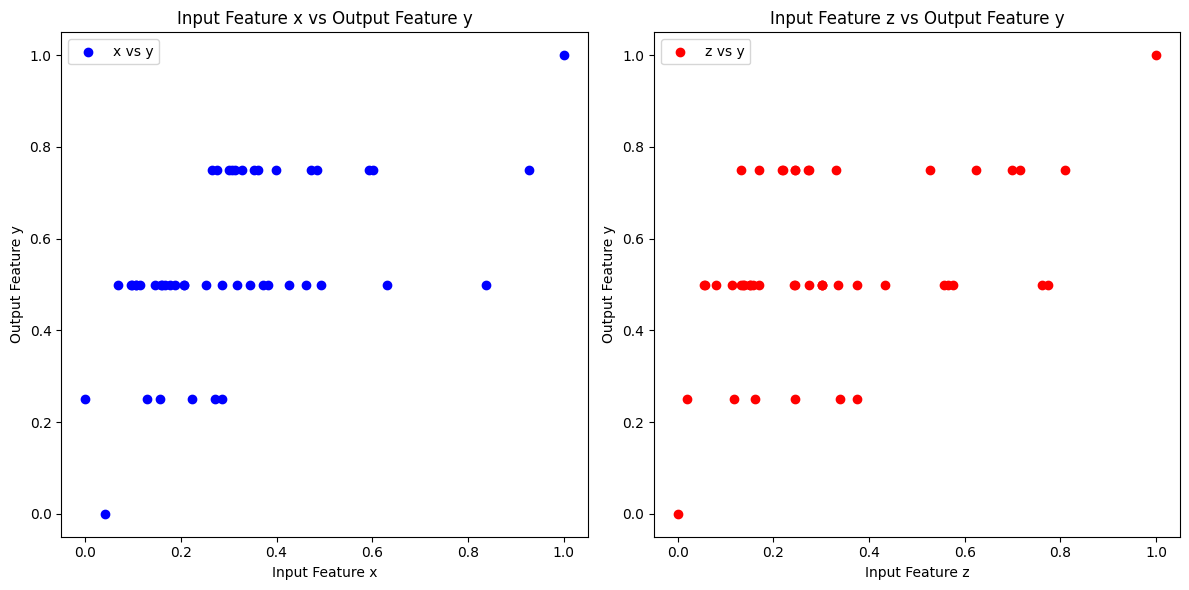

In [32]:
plt.figure(figsize=(12, 6))

# Plot x vs y
plt.subplot(1, 2, 1)
plt.scatter(house_price_data['x'], house_price_data['y'], color="blue", label='x vs y')
plt.xlabel('Input Feature x')
plt.ylabel('Output Feature y')
plt.title('Input Feature x vs Output Feature y')
plt.legend()

# Plot z vs y
plt.subplot(1, 2, 2)
plt.scatter(house_price_data['z'], house_price_data['y'], color="red", label='z vs y')
plt.xlabel('Input Feature z')
plt.ylabel('Output Feature y')
plt.title('Input Feature z vs Output Feature y')
plt.legend()

plt.tight_layout()
plt.show()


# **TASK 03**

Now I need to display the statistical information for each of the input features

In [23]:
print(house_price_data.describe())


                 x          y              z
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [24]:
print("Mean:")
print(house_price_data.mean())
print("\nMedian:")
print(house_price_data.median())
print("\nStandard Deviation:")
print(house_price_data.std())
print("\nVariance:")
print(house_price_data.var())


Mean:
x      2000.680851
y         3.170213
z    340412.659574
dtype: float64

Median:
x      1888.0
y         3.0
z    299900.0
dtype: float64

Standard Deviation:
x       794.702354
y         0.760982
z    125039.899586
dtype: float64

Variance:
x    6.315518e+05
y    5.790934e-01
z    1.563498e+10
dtype: float64


# **TASK 04**

Now I need to prepare the dataset by normalizing or scaling the feature set. We will have our Normalization range -1 to 1 or 0 to 1. Normalization helps reduce the time to train a model with a huge variety of data.

In [33]:
for column in house_price_data.columns:
  house_price_data[column] = (house_price_data[column] - house_price_data[column].min()) / (house_price_data[column].max() - house_price_data[column].min())

print(house_price_data.head())

          x     y         z
0  0.345284  0.50  0.433962
1  0.206288  0.50  0.301887
2  0.426917  0.50  0.375660
3  0.155543  0.25  0.117170
4  0.592388  0.75  0.698113


# **TASK 05**

Now, we need to split the dataset into train and test sets. We will be using 80% of the dataset as the training set and the rest 20% ase the testing set.

In [30]:
from sklearn.model_selection import train_test_split

X = house_price_data[['x', 'y']]
y = house_price_data['z']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37, 2)
(10, 2)
(37,)
(10,)


# **TASK 06**

Now, we need to implemnt the Hypothesis function.